In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://gfuel.com/collections/new-g-fuel-ready-to-drink-cans"
headers = {
    'User-Agent' : "Mozilla/5.0  (X11; Linux x86_64 AppleWebKit/537.36 (KHT))"
}

response = requests.request("GET", url, headers = headers)

In [36]:
data = BeautifulSoup(response.text, 'html.parser')
print(data.prettify())

<!DOCTYPE doctype html>
<!--[if IE 8]><html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if IE 9 ]><html class="ie9 no-js"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <!-- Basic page needs ================================================== -->
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="//cdn.shopify.com/s/files/1/0223/3113/files/favicon-red_32x32.png?v=1509732848" rel="shortcut icon" type="image/png"/>
  <!-- Title and description ================================================== -->
  <title>
   SHOP READY-TO-DRINK G FUEL CANS
  </title>
  <meta content="Shipping Available to the U.S. Only!" name="description"/>
  <!-- Helpers ================================================== -->
  <!-- /snippets/social-meta-tags.liquid -->
  <meta content="website" property="og:type"/>
  <meta content="SHOP READY-TO-DRINK G FUEL CANS" property="og:title"/>
  <meta content="http://cd

In [37]:
cards_data = data.find_all ('div', attrs = {'class', 'grid__item two-tenths small--one-half medium--one-half medium-large--four-twelfths'})
print ('Total Number of Cards Found : ', len(cards_data))
for card in cards_data:
    print(card.text)

Total Number of Cards Found :  16











Black on Blackberry Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















Black on Blackberry Cans (4 Pack)

SHIPS U.S. ONLY


$10.99
VIEW PRODUCT
















Variety Pack Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















Variety Pack Cans (4 Pack)

SHIPS U.S. ONLY


$10.99
VIEW PRODUCT
















Blue Ice Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















Blue Ice Cans (4 Pack)

SHIPS U.S. ONLY


$10.99
VIEW PRODUCT
















FaZeberry Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















FaZeberry Cans (4 Pack)

SHIPS U.S. ONLY


$10.99
VIEW PRODUCT
















Sour Cherry Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















Sour Cherry Cans (4 Pack)

SHIPS U.S. ONLY


$10.99
VIEW PRODUCT
















Rainbow Sherbet Cans (12 Pack)

SHIPS U.S. ONLY


$31.99
VIEW PRODUCT
















Rainbow Sherbet Cans (4 Pack)

SHIPS U.S. ONLY

In [38]:
for card in cards_data:
    nama=card.find('h3')
    harga=card.find('div', attrs = {'class', 'price'})
print(nama.text,harga.text)



Sour Blue Chug Rug Cans

4 Pack
 $10.99


In [50]:
    card_details['nama'] = nama.text
    card_details['harga'] = harga.text.replace('$',' ').replace('.', '')
    
    
    scraped_data.append(card_details)
    
dataFrame = pd.DataFrame.from_dict(scraped_data)
dataFrame.to_csv('minuman.csv',index=False)

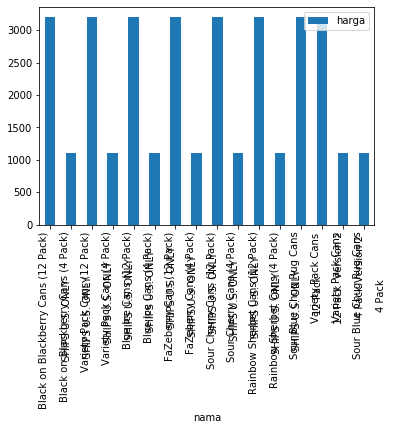

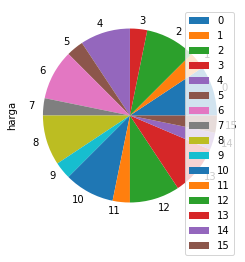

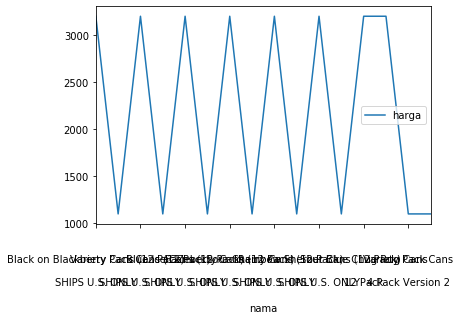

In [49]:
import matplotlib as plt

df=pd.read_csv("minuman.csv")
df.plot(kind = "bar", x="nama", y="harga")

df.plot(kind = "pie", x="nama", y="harga")
df.plot(kind = "line", x="nama", y="harga")